<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/main/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


Team 19:

We are creating a Hypothesis from Formula 1 Data Sets recruiting for a specic constructor by analyzing and focusing on Data from the following files:

*driver
*results
*lap times

We are going to do a basic analysis of the top ten drivers.

How many wins they have from the previous season for 2023?
The average race lap times for the 2023 per driver?



# **Import libraries**

In [4]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.9 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

**Read in data**

In [21]:
# prompt:

import pandas as pd

driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')


Fing the top 10 drivers base upon the points overall in history.


In [19]:
# Group the results by driver and calculate the sum of points
driver_points = results.groupby('driverId')['points'].sum()
# Sort the drivers by points in descending order
sorted_drivers = driver_points.sort_values(ascending=False)
# Print the top 5 drivers and their points
print(sorted_drivers.head(5))

driverId
1      4540.5
20     3098.0
830    2275.5
4      2203.0
8      1873.0
Name: points, dtype: float64


In [22]:
top_drivers = pd.merge(driver_standings, drivers, on='driverId')

top_drivers = top_drivers.groupby('driverId')['points'].sum()
top_drivers = top_drivers.sort_values(ascending=False).head(10)

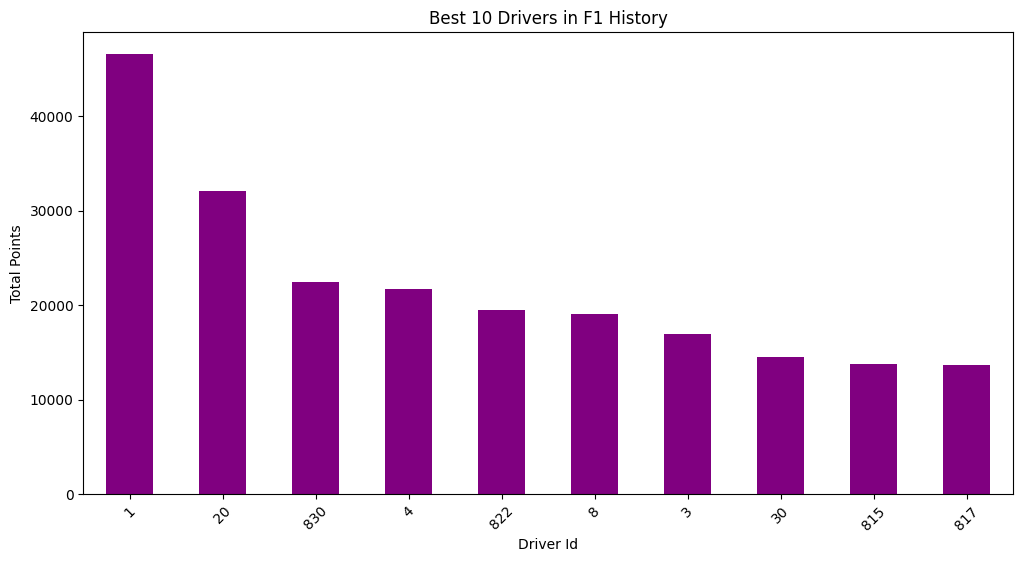

In [23]:
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='bar', color='purple')
plt.xlabel('Driver Id')
plt.ylabel('Total Points')
plt.title('Best 10 Drivers in F1 History')
plt.xticks(rotation=45)
plt.show()